In [1]:
import numpy as np
import math
from collections import Counter
from typing import NamedTuple
from pprint import pprint
import sklearn.metrics
import scipy.stats
import matplotlib.pyplot as plt


rng = np.random.default_rng()

Instructions: https://work.caltech.edu/homework/hw4.pdf

Answers: http://work.caltech.edu/homework/hw4_sol.pdf

# Generalization Error

# 1.

From the original VC Inequality:

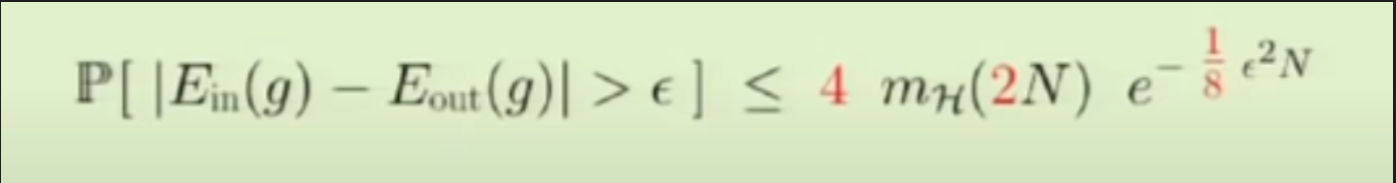

Since we want 95% confidence, δ = 0.05. 

ε = 0.05.

So we can write:

0.05 <= 4 m<sub>H</sub>(2N) e<sup>-1/8 0.05<sup>2</sup>N</sup>

0.05 <= 4 (2N)<sup>10</sup> e<sup>-1/8 0.05<sup>2</sup>N</sup>

Let's look at the answers numerically:

In [8]:
def δ_bound(N):
    return 4 * (2 * N)**10 * math.exp(-(1/8)* ((0.05)**2) * N)

print(f"Answer [a] gives δ of {δ_bound(400_000)}")
print(f"Answer [b] gives δ of {δ_bound(420_000)}")
print(f"Answer [c] gives δ of {δ_bound(440_000)}")
print(f"Answer [d] gives δ of {δ_bound(460_000)}")
print(f"Answer [e] gives δ of {δ_bound(480_000)}")

Answer [a] gives δ of 221896.07655417608
Answer [b] gives δ of 697.7536261452768
Answer [c] gives δ of 2.14484271996018
Answer [d] gives δ of 0.006458125661103743
Answer [e] gives δ of 1.9080951877323054e-05


My answer: <font color="green">d</font>

# 2.

In [39]:
d_vc = 50
δ = 0.05

def orig_vc_bound(N):
    return np.sqrt( (8/N) * np.log( (4 * (2*N)**d_vc ) / δ ) )

def rademacher_penalty_bound(N):
    return np.sqrt( (2 * np.log( 2 * N * N**d_vc )) / N ) + np.sqrt((2/N) * np.log(1/δ)) + (1 / N)


For the implicit bounds in [c] and [d], implicit means that ε appears on both sides of the bound.
    
I'm lazy so I just used 2025 AI to rewrite these as functions of ε only (in both cases it's a quadratic where we only need the + root):

[c] 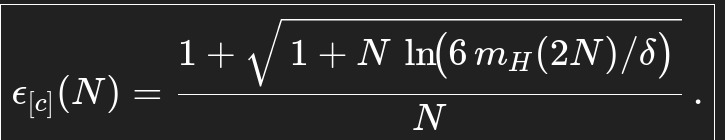

[d] 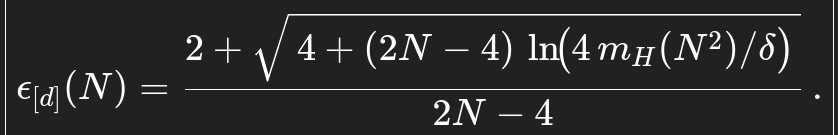

In [65]:
def parrondo_van_den_broek(N):
    return (1+np.sqrt( 1 + N * np.log( (6*(2*N)**d_vc) / δ ) )) / N

def devroye(N):
    return (2+np.sqrt( 4 + (2*N - 4) * np.log( (4 * ((N**2)**d_vc)) / δ ) ))/(2*N - 4)

10000.0


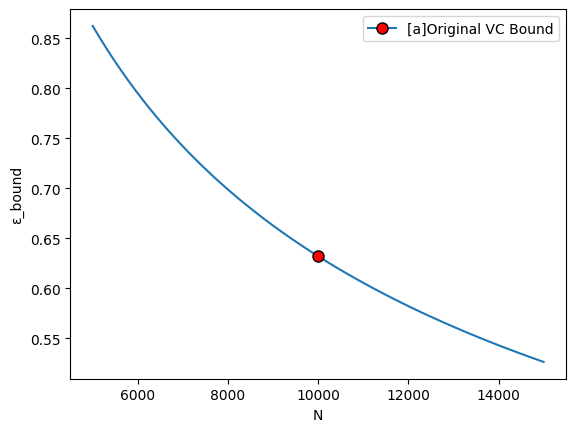

In [59]:
n = np.linspace(5_000, 15_000, num=101)
print(n[50])

y = orig_vc_bound(n)
plt.plot(n, y, '-', marker='o', label='[a]Original VC Bound', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

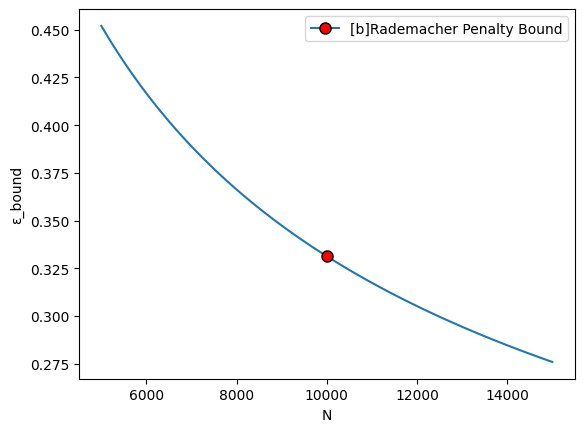

In [61]:
y = rademacher_penalty_bound(n)
plt.plot(n, y, '-', marker='o', label='[b]Rademacher Penalty Bound', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

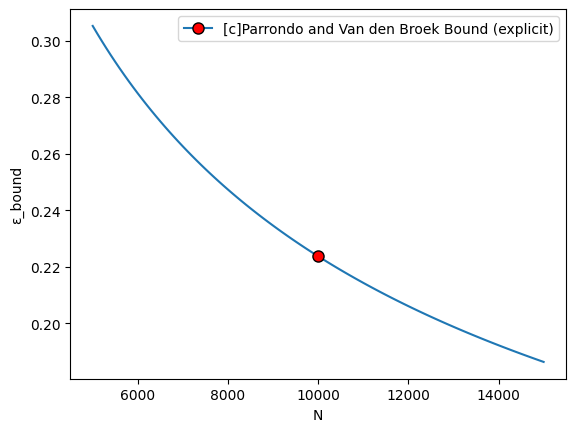

In [63]:
y = parrondo_van_den_broek(n)
plt.plot(n, y, '-', marker='o', label='[c]Parrondo and Van den Broek Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

/tmp/ipykernel_199963/1272172281.py:5: RuntimeWarning: overflow encountered in power
  return (2+np.sqrt( 4 + (2*N - 4) * np.log( (4 * ((N**2)**d_vc)) / δ ) ))/(2*N - 4)


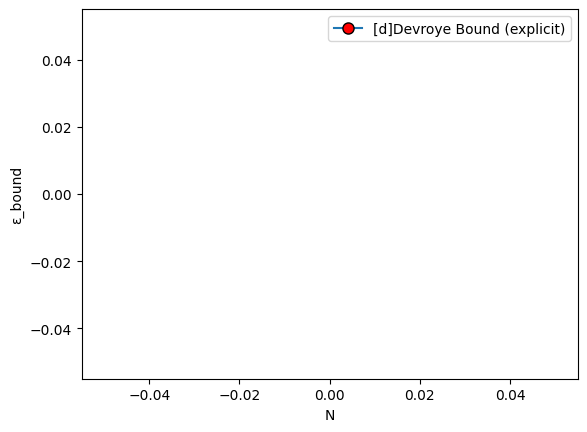

In [66]:
y = devroye(n)
plt.plot(n, y, '-', marker='o', label='[d]Devroye Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

Devroye doesn't compute, could be that the exp involves very large numbers, or that I have a bug in the explicit derivation or function impl.

Let's see if I get a value directly for 10_000:

In [67]:
devroye(10_000)

OverflowError: int too large to convert to float

There's probably some tricks we can do to rewrite the exponential in the log in much friendlier terms. Oooor we could deploy cannons:

In [69]:
import mpmath as mp

mp.mp.dps = 80

def devroye_mp(N):
    N, dvc, delta = mp.mpf(N), mp.mpf(d_vc), mp.mpf(δ)
    big_log = mp.log( 4 * mp.power(N, 2*dvc) / delta )
    term    = mp.sqrt(4 + (2*N - 4)*big_log)
    return (2 + term) / (2*N - 4)

devroye_mp(10_000) 

mpf('0.21522804980824666970042078745691121256478323958264754493360089755521412433610118541')

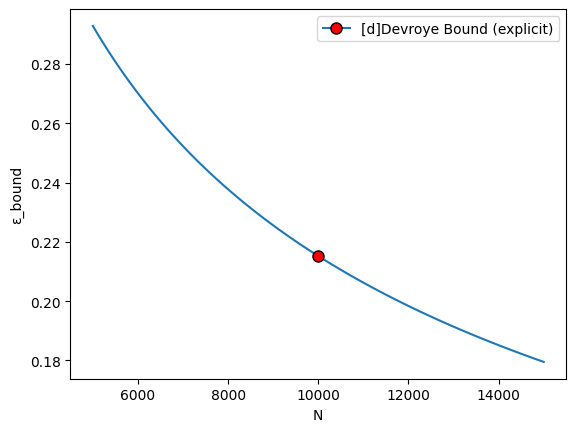

In [71]:
y = np.vectorize(devroye_mp)(n)
plt.plot(n, y, '-', marker='o', label='[d]Devroye Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[50])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

My answer: <font color="green">d</font>

# 3.

In [76]:
n = np.linspace(1, 10, num=10)
print(n[4])

5.0


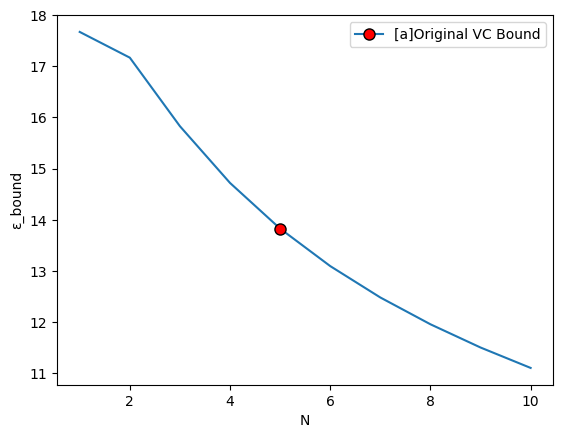

In [78]:
y = orig_vc_bound(n)
plt.plot(n, y, '-', marker='o', label='[a]Original VC Bound', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[4])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

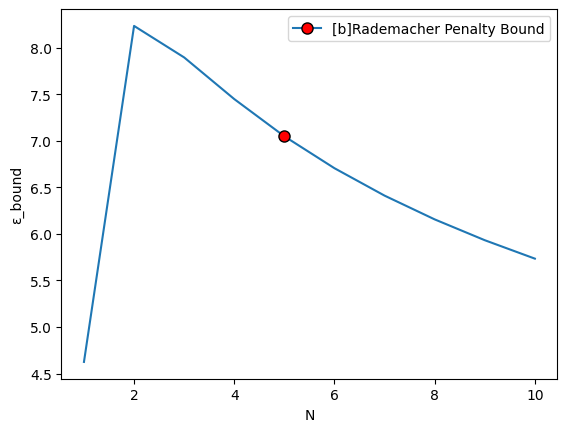

In [79]:
y = rademacher_penalty_bound(n)
plt.plot(n, y, '-', marker='o', label='[b]Rademacher Penalty Bound', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[4])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

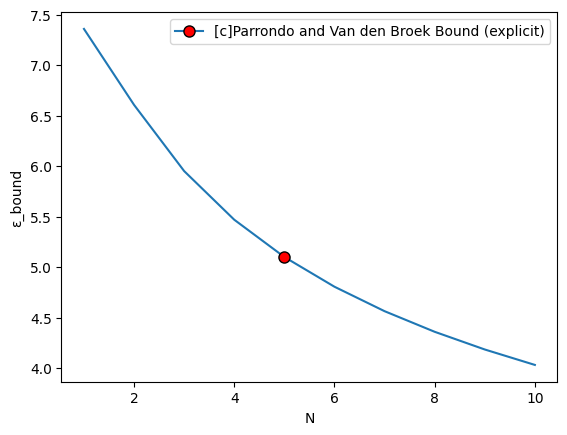

In [80]:
y = parrondo_van_den_broek(n)
plt.plot(n, y, '-', marker='o', label='[c]Parrondo and Van den Broek Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[4])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

In [81]:
y = np.vectorize(devroye_mp)(n)
plt.plot(n, y, '-', marker='o', label='[d]Devroye Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[4])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

ZeroDivisionError: 

Devroye seems to have problems below 3, so:

In [92]:
n = np.linspace(3, 10, num=8)
print(n[2])

5.0


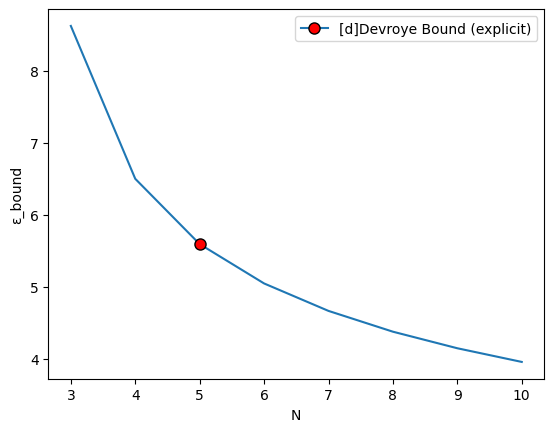

In [93]:
y = np.vectorize(devroye_mp)(n)
plt.plot(n, y, '-', marker='o', label='[d]Devroye Bound (explicit)', markersize=8, markerfacecolor='red', markeredgecolor='k', markevery=[2])
plt.xlabel('N')
plt.ylabel('ε_bound')
plt.legend()
plt.show()

This seems slightly higher than Parrando and Van der Broek, let's double-check numerically:

In [94]:
print(f"Parrondo at 5 is: {parrondo_van_den_broek(5)}")
print(f"Devroye at 5 is: {devroye_mp(5)}")

Parrondo at 5 is: 5.101361981989992
Devroye at 5 is: 5.5931255431826696040299302245173807648523629470524088203288810606133511538739636


My answer: <font color="green">c</font>

# Bias and Variance

# 4. 

h(x) = ax

Since I forgot everything about integration -.- let's do this numerically via Monte Carlo simulation.

However for fitting each line ax, we can do some derivation to find the minimum `a` in one step:

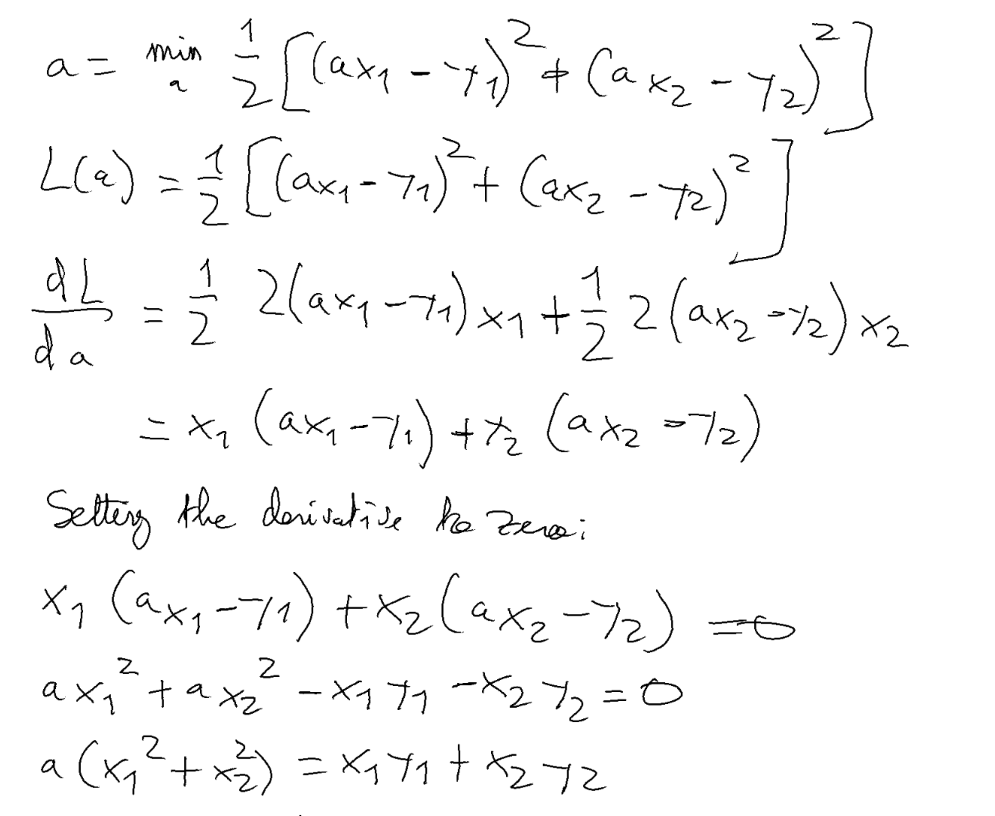

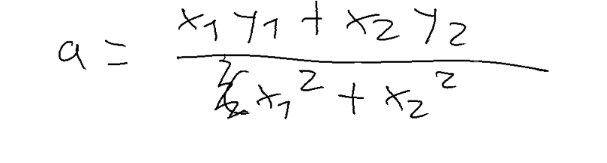


In [117]:
def two_sample_a():
    # Generate two independently random points on target function f(x) = sin(πx)
    x = rng.uniform(-1, 1, 2)
    assert x.shape == (2,)
    y = np.sin(np.pi * x)
    assert y.shape == (2,)

    # Pick a with minimal mean squared error according to what we derived above
    return (x[0] * y[0] + x[1] * y[1]) / (x[0]**2 + x[1]**2)

    
N = 10_000_000
all_as = np.array([two_sample_a() for _ in range(N)])
a_hat = all_as.mean()

print(round(a_hat,2))

1.43


Looks like <font color="green">[e]</font> if I didn't get it all wrong ; )

# 5.
The bias is how well my "most perfect" hypothesis fits the curve `sin(πx)`, or rather the error in fitting.

So I need to find the difference between the two curves `g_bar(x) = a_hat * x` and `f(x)`:

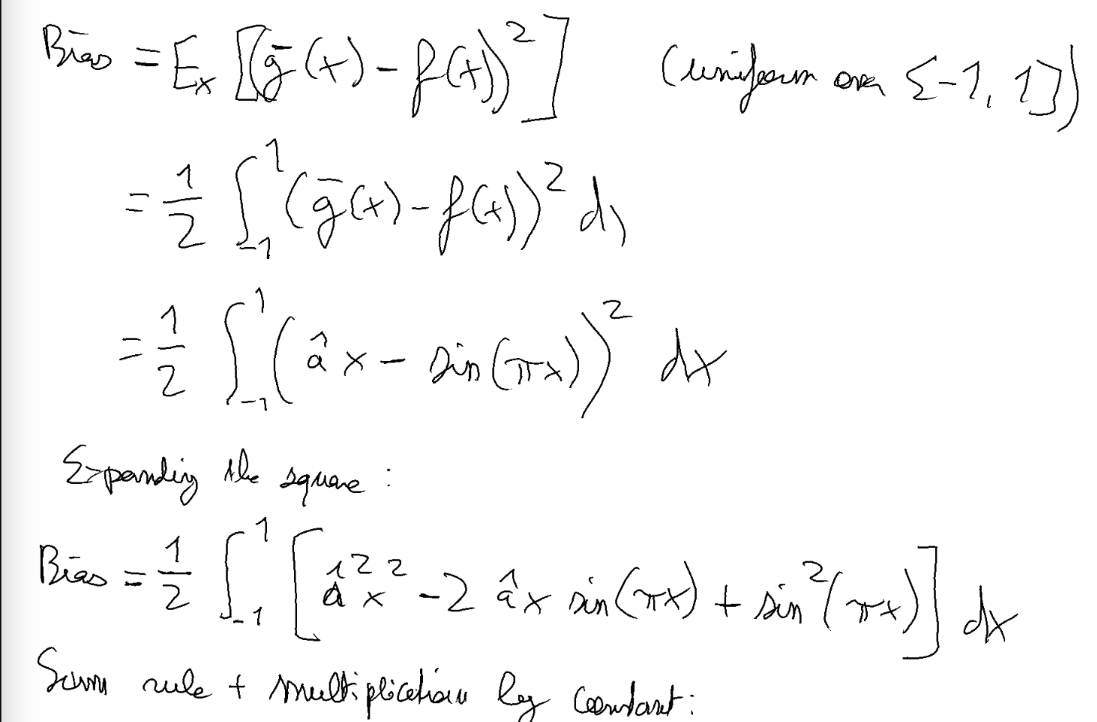

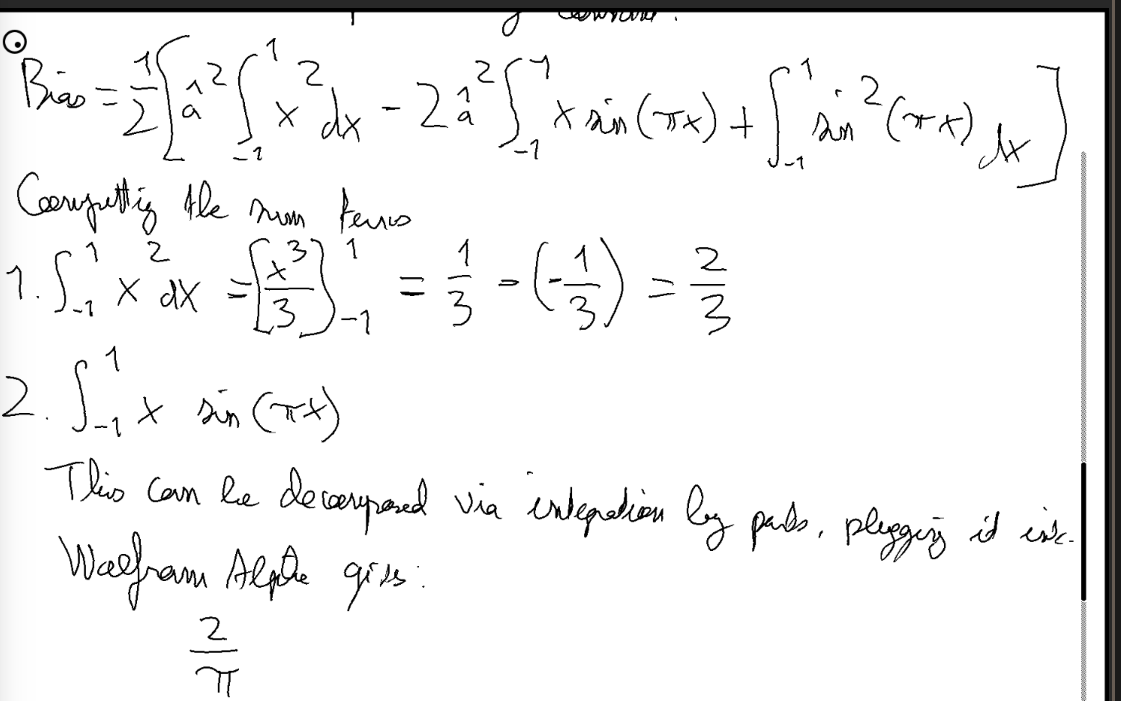

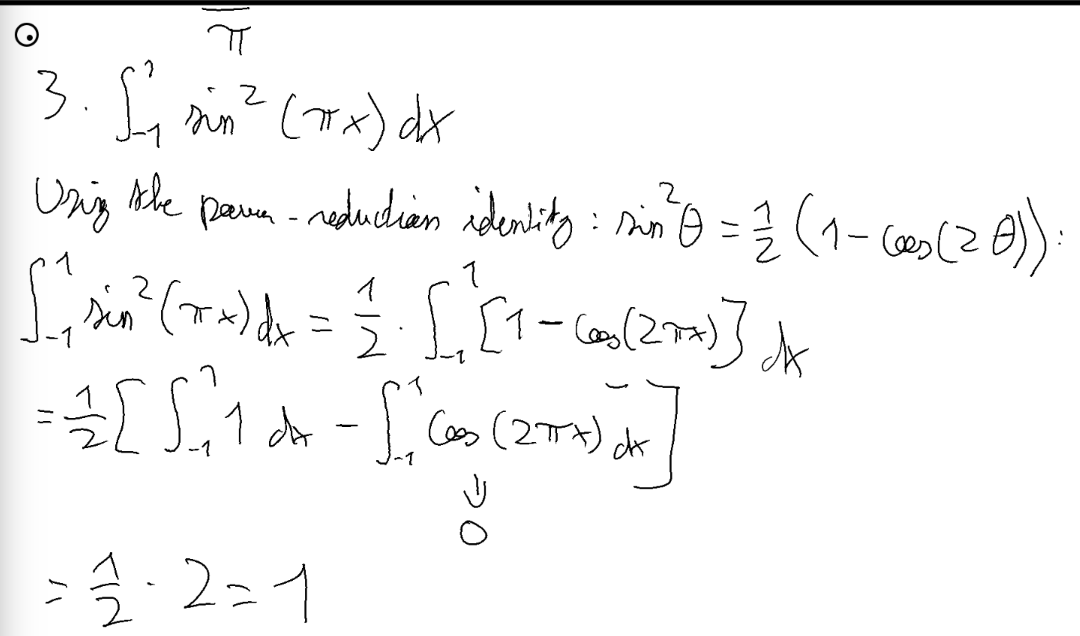

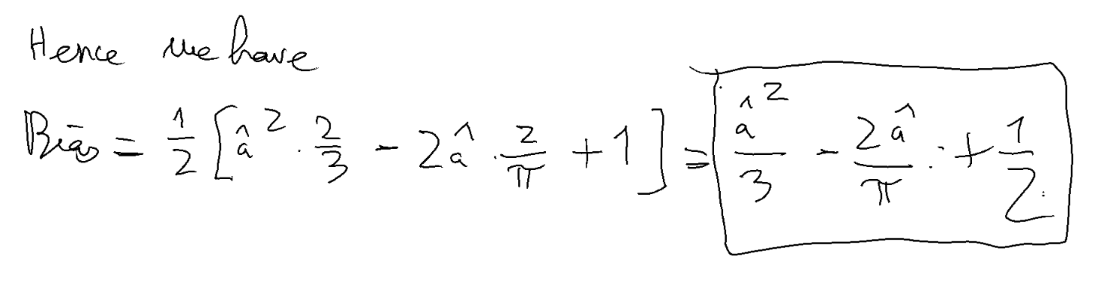



In [120]:
a_hat**2 / 3 - (2*a_hat)/math.pi + 1/2

0.27075699543623466

That looks closest to answer <font color="green">[b]</font>

# 6.

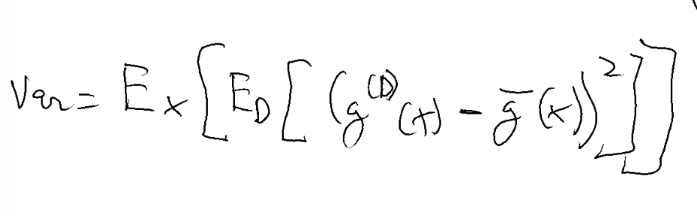

That does look like a lot of integration, and since we'll have to do it for other H as well in question 7, I'd better come up with a way to do find this by Monte Carlo.

Let's do it for the bias above first, because we get a x-check for free to see if the value matches what we computed analytically:

In [144]:
def estimate_bias(n_datasets, n_validation_points, f):
   
    all_as = np.array([two_sample_a() for _ in range(n_datasets)])
    
    a_hat = all_as.mean()
    
    x = np.random.uniform(-1, 1, n_validation_points)
    y = f(x)
    
    return np.mean((a_hat * x - y)**2)

n_datasets = 200_000
n_validation_points = 100_000
f = lambda x: np.sin(np.pi * x)

estimate_bias(n_datasets=n_datasets, n_validation_points=n_validation_points, f=f)

0.2725731628225321

For the variance, multiplying arrays this large runs out of RAM, so let's use a trick that I haven't fully understood which combines Linearity of Expectations with Independence o_O to get



In [145]:
def estimate_variance(n_datasets, n_validation_points, f):
   
    all_as = np.array([two_sample_a() for _ in range(n_datasets)])
    
    a_hat = all_as.mean()
    
    x = np.random.uniform(-1, 1, n_validation_points)
    y = f(x) # not needed since already baked into two_sample_a(), but will be needed later

    # Variance computation split over Var_D(a) * E_x[x^2]
    variance_a = all_as.var()
    return variance_a * np.mean(x**2)

n_datasets = 200_000
n_validation_points = 100_000
f = lambda x: np.sin(np.pi * x)

estimate_variance(n_datasets=n_datasets, n_validation_points=n_validation_points, f=f)

0.23644123606957193

This is closest to answer <font color="green">[a]</font> and is slightly smaller than the bias.

# 7.

Here we'll need different "parameter fitting" functions:



In [153]:
def sample_two_points_from_f():
    # Generate two independently random points on target function f(x) = sin(πx)
    x = rng.uniform(-1, 1, 2)
    assert x.shape == (2,)
    y = np.sin(np.pi * x)
    assert y.shape == (2,)
    return (x, y)

def two_sample_fitter_a():
    (x, y) = sample_two_points_from_f()

    return np.mean(y)

def two_sample_fitter_b():
    (x, y) = sample_two_points_from_f()

    # Same as above
    return (x[0] * y[0] + x[1] * y[1]) / (x[0]**2 + x[1]**2)

def two_sample_fitter_c():
    (x, y) = sample_two_points_from_f()

    # This is an exact fit since two points form a line, so it's simply the line through (x1, y2) and (x2, y2)
    x1, x2 = x
    y1, y2 = y
    a = (y1 - y2)/(x1 - x2)
    b = y1 - a*x1
    return a, b

def two_sample_fitter_d():
    (x, y) = sample_two_points_from_f()

    # Similar derivation as for f(x) = a*x
    phi = x**2
    assert phi.shape == (2,)
    return (phi[0]*y[0] + phi[1]*y[1])/(phi[0]**2 + phi[1]**2)

def two_sample_fitter_e():
    (x, y) = sample_two_points_from_f()

    # Also a perfect fit
    x1, x2 = x
    y1, y2 = y
    a = (y1 - y2)/(x1**2 - x2**2)
    b = y1 - a*x1**2
    return a, b

Estimate bias and variance for [a]

So far so good, but I don't understand enough about variance and covariance to derive the generic version of estimating the variance with more than one parameter, so I'll leave it at this and give up for now.

Instead we could also build multi-step learners for each, and get the answer by even more approximation =) but I'm too lazy for now.

# VC Dimension

# 8.

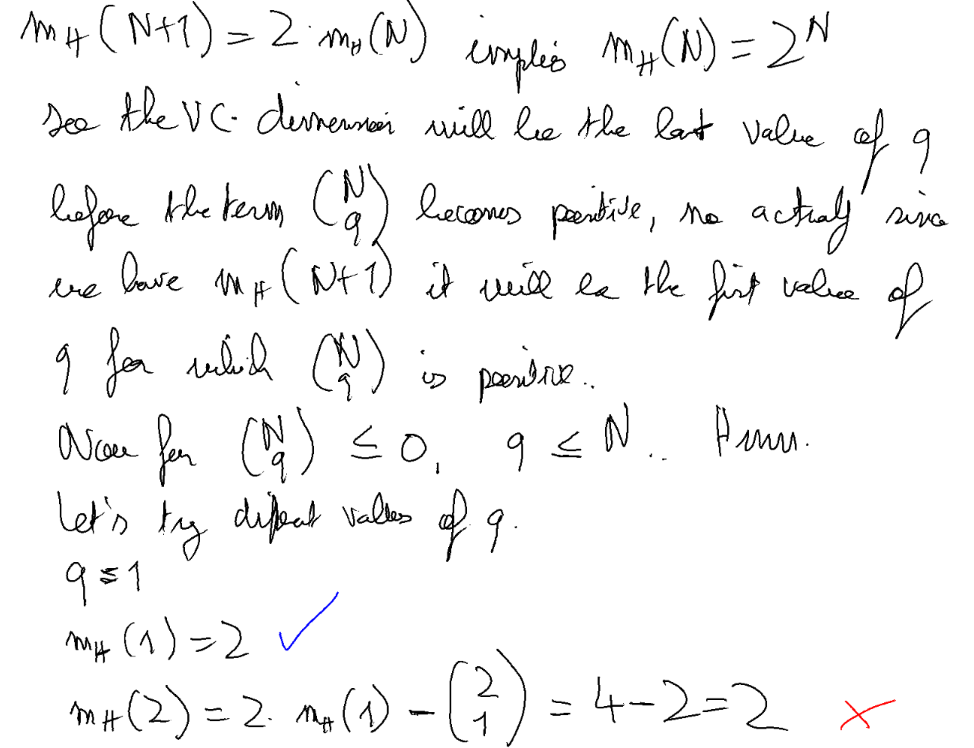

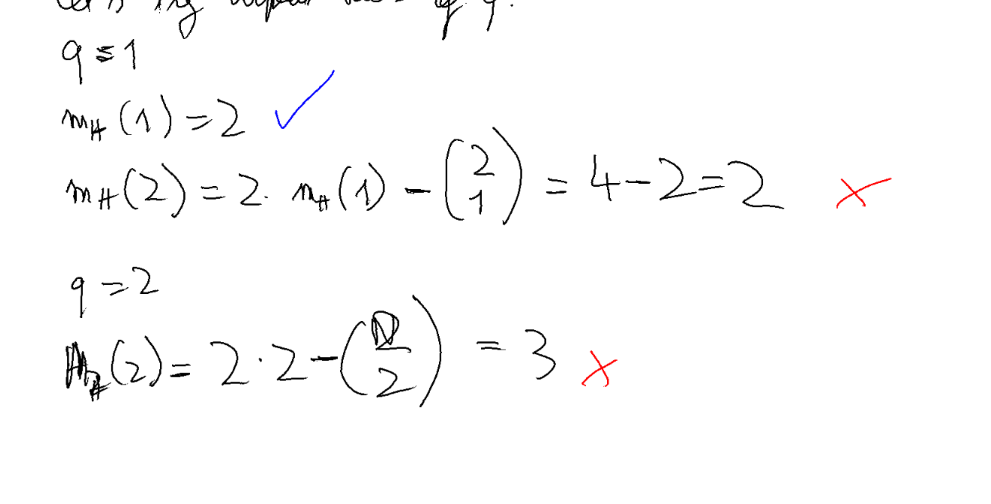

So the VC dimension appears to be q for q=1, but q-1 for q=2, so the answer has to be:

<font color="red">[e]</font>

Ah I messed up the N choose q term -.-, so the deduction above was correct after all:

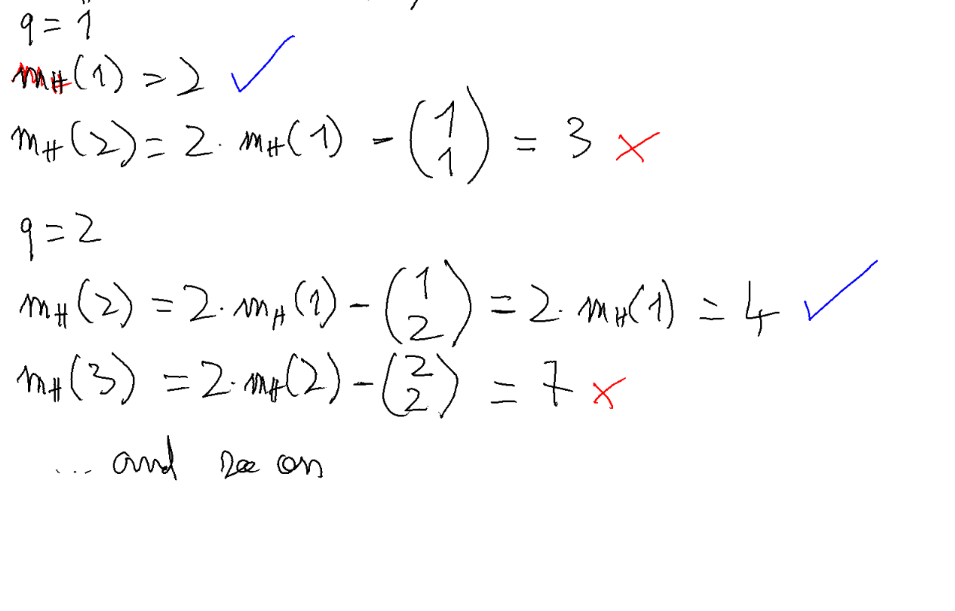

So <font color="green">[c]</font> is indeed correct.

# 9.

Intersection means whatever we pick from H<sub>k must be common to all hypothesis sets, so the bound should be relatively tight.

So the lower bound needs to be the lower bound of at least one of the hypotheses, meaning we can exclude [a] - [c] right away and focus on [d] and [e].

Now taking the max as the higher bound seems excessive, but better than summing them up, so intuitive without checking/proving I would go for


<font color="red">[d]</font>                                                                 

                                                                                                                                              

Thinking again, there could be no intersection at all between the Hypothesis sets, so the intersection could an empty set, so my lower bound deduction above was wrong and we instead need to focus on 0 as the lower bound, i.e. [a] - [c].

The max and summation both seem to be too tight of a bound.

But is the minimum correct? Since we're looking at intersection, whatever hypothesis set we pick would not be able to shatter more points than the weakest of the sets, so min should indeed be the tightest, correct upper bound.

<font color="green">[b]</font>

# 10.

The union of the Hypothesis sets cannot be empty (save if one of the hyposthesis sets H<sub>k is empty, in which case it would factor into the minimum.

So is the lower bound the min or max? Since any hypothesis could be in any of the hypothesis sets, we could end up picking from the hypothesis set with the worst d<sub>VC</sub>, so the lower bound needs to be the max, leaving `[d]` and `[e]` as possible answers.

Deciding between these seems complex, but again intuitively, [d] seems to tight of a bound since something "has to be lost" due to overlap in the union of all these hypotheses sets.

So I'm going to go with <font color="green">[e]</font>.